https://adventofcode.com/2021

In [1]:
import os
import pandas as pd
import numpy as np
import re
from statistics import median
from collections import Counter
from collections import defaultdict
import heapq
from binarytree import Node
import ast

# Day 1
Count the number of times a depth measurement increases from the previous measurement.

In [8]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\1'
#file = r'test.txt'
file = r'input.txt'
data = pd.read_csv(os.path.join(folder,file))
data.head()

,measurement
0,196
1,197
2,176
3,182
4,179


In [9]:
def d1p1(measurements):    
    counter = 0

    # Count how many elements are larger than the previous element
    for i in range(len(measurements)-1):
        if measurements[i] < measurements[i+1]:
            counter += 1
        
    return counter

In [10]:
measurements = list(data.measurement)

d1p1(measurements)

1228

In [11]:
def d1p2(measurements):
    counter = 0
    
    # an element is the sum of 3 consecutive data points
    # count how many elements are larger than the previous element
    for i in range(len(measurements)-2):
        if sum(measurements[i:i+3]) < sum(measurements[i+1:i+4]):
            counter += 1
        
    return counter

In [12]:
d1p2(measurements)

1257

# Day 2
Calculate the horizontal position and depth you would have after following the planned course. What do you get if you multiply your final horizontal position by your final depth?

In [18]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\2'
#file = r'test.txt'
file = r'input.txt'
data = pd.read_csv(os.path.join(folder,file),sep=' ')
data.head()

,direction,distance
0,forward,3
1,down,9
2,forward,6
3,down,3
4,forward,8


In [19]:
def d2p1(data):
    x = 0
    y = 0

    for idx, row in data.iterrows():
        if row.direction == 'forward': # increase horizontal position
            x += row.distance
        elif row.direction == 'down': # increase depth
            y += row.distance
        elif row.direction == 'up': # decrease depth
            y -= row.distance

    return x*y

In [20]:
d2p1(data)

2073315

In [21]:
def d2p2(data):
    x = 0
    y = 0
    aim = 0

    for idx, row in data.iterrows():
        if row.direction == 'forward': 
            x += row.distance           # increase horizontal position
            y += (aim * row.distance)   # increase depth using aim and distance
        elif row.direction == 'down':   # increase aim
            aim += row.distance
        elif row.direction == 'up':     # decrease aim
            aim -= row.distance        
            
    return x*y

In [22]:
d2p2(data)

1840311528

# Day 3
**Part 1:** Use the binary numbers in the diagnostic report to generate two new binary numbers (called the gamma rate and the epsilon rate). The power consumption can then be found by multiplying the gamma rate by the epsilon rate.

**Part 2:** Verify the life support rating, which can be determined by multiplying the oxygen generator rating by the CO2 scrubber rating

In [161]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\3'
#file = r'test.txt'
file = r'input.txt'
data = pd.read_csv(os.path.join(folder,file),dtype={'data':str})
data.head()

,data
0,001110000001
1,010100101000
2,101101010010
3,010111101010
4,100011100110


In [162]:
def d3p1(data):
    # gamma rate is the most common bit from each position
    # epsilot rate is the least common bit from each position
    
    data = data['data'].apply(lambda x: pd.Series(list(x)))
    gamma = data.mode()
    gamma = ''.join(list(gamma.loc[0,:]))
    epsilon = ''.join('1' if x == '0' else '0' for x in gamma)
    
    return int(gamma,2) * int(epsilon,2)

In [163]:
d3p1(data)

2972336

In [164]:
def d3p2(data):
    data = data['data'].apply(lambda x: pd.Series(list(x)))
    
    # get oxygen generator rating
    temp = data.copy()
    col = 0
    
    # loop over bits until only one value remains
    while (len(temp)>1) & (col < len(data.columns)):
        # keep only values with the most common value for this bit
        mode = temp[[col]].mode()
        mode = mode.values[0][0] if len(mode)==1 else '1' # if 1 and 0 are equally common, use 1
        temp = temp[(temp[[col]]==mode).values]
        col += 1
        
    temp.reset_index(drop=True,inplace=True)
    oxegen =''.join(list(temp.loc[0,:]))
    
    # get CO2 scrubber rating
    temp = data.copy()
    col = 0
    
    # loop over bits until only one value remains
    while (len(temp)>1) & (col < len(data.columns)):
        # keep only values with the least common value for this bit
        mode = temp[[col]].mode()
        mode = mode.values[0][0] if len(mode)==1 else '1'
        mode = '1' if mode == '0' else '0'
        temp = temp[(temp[[col]]==mode).values]
        col += 1
        
    temp.reset_index(drop=True,inplace=True)
    c02 =''.join(list(temp.loc[0,:]))
    

    return int(oxegen,2) * int(c02,2)

In [165]:
d3p2(data)

3368358

# Day 4
The score of a winning board is calculated by finding the sum of all unmarked numbers on that board. Then, multiply that sum by the number that was just called when the board won to get the final score.

**Part 1:** To guarantee victory against the giant squid, figure out which board will win first. What will your final score be if you choose that board?

**Part 2:** Figure out which board will win last. Once it wins, what would its final score be?

In [291]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\4'
#file = r'test_numbers.txt'
file = r'numbers.txt'
with open(os.path.join(folder,file)) as f:
    numbers = f.readlines()
    
numbers = numbers[0].split(',')
numbers = list(map(int, numbers))
numbers = [100 if n == 0 else n for n in numbers] #replace 0 with 100 so that 0s mean bingo 


In [15]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\4'
file = r'test_boards.txt'
#file = r'boards.txt'

boards = []
b = []

# read in bingo boards. each board is a list of lists for each row 
with open(os.path.join(folder,file)) as f:
    for l in f:
        l = l.replace('\n','')
        if l == '':
            boards.append(b)
            b = []
        else:
            l = [int(l[i:i+2].strip()) for i in range(0, len(l), 3)]
            l = [100 if i == 0 else i for i in l]
            b.append(l)

In [16]:
boards

[[[22, 13, 17, 11, 100],
  [8, 2, 23, 4, 24],
  [21, 9, 14, 16, 7],
  [6, 10, 3, 18, 5],
  [1, 12, 20, 15, 19]],
 [[3, 15, 100, 2, 22],
  [9, 18, 13, 17, 5],
  [19, 8, 7, 25, 23],
  [20, 11, 10, 24, 4],
  [14, 21, 16, 12, 6]],
 [[14, 21, 17, 24, 4],
  [10, 16, 15, 9, 19],
  [18, 8, 23, 26, 20],
  [22, 11, 13, 6, 5],
  [2, 100, 12, 3, 7]]]

In [250]:
def d4p1(numbers,boards):
    bingo = False

    for draw in numbers: 
        # check each board
        for b in range(len(boards)):
            # check each row in the board
            for r in range(len(boards[b])):
                # check each column
                for c in range(len(boards[b][r])):
                    if boards[b][r][c] == draw:
                        boards[b][r][c] = 0
                        # check for bingo
                        if sum(boards[b][r]) == 0:
                            print('Bingo on board: {b} for draw: {d}'.format(b=b,d=draw))
                            bingo = True
                            break
                        elif sum([item[c] for item in boards[b]]) == 0:
                            bingo = True
                            break

                if bingo:
                    break
            if bingo:
                break
        if bingo:
            break
       
    # compute score
    score = 0
    for r in boards[b]:
        # convert 100s back to 0s
        x = [0 if i == 100 else i for i in r]
        score += sum(x)
    
    return draw*score

In [266]:
d4p1(numbers,boards)

Bingo on board: 2 for draw: 24


4512

In [293]:
def d4p2(numbers,boards):
    bingo = [False]*len(boards)
    
    for draw in numbers: 
        # check each board
        for b in range(len(boards)):
            # only check board if it hasn't already reached bingo
            if not bingo[b]:
                # check each row in the board
                for r in range(len(boards[b])):
                    # check each column
                    for c in range(len(boards[b][r])):
                        if boards[b][r][c] == draw:
                            boards[b][r][c] = 0
                            # check for bingo
                            if sum(boards[b][r]) == 0:
                                bingo[b] = True
                                finalDraw = draw
                                finalBoard = b
                                break

                            elif sum([item[c] for item in boards[b]]) == 0:
                                bingo[b] = True
                                finalDraw=draw
                                finalBoard = b
                                break
                        if bingo[b]:
                            break
                    if bingo[b]:
                        break

    # compute score     
    score = 0
    for r in boards[finalBoard]:
        # convert 100s back to 0s
        x = [0 if i == 100 else i for i in r]
        score += sum(x)
    
    return finalDraw*score

In [294]:
d4p2(numbers,boards)

3178

# Day 5
Each line of vents is given as a line segment in the format x1,y1 -> x2,y2 where x1,y1 are the coordinates of one end the line segment and x2,y2 are the coordinates of the other end. These line segments include the points at both ends.

**Part 1:** Considering only horizontal and vertical lines, determine the number of points where at least two lines overlap.

**Part 2:** Considering horizontal, vertical, and diagonal lines, determine the number of points where at least two lines overlap.

In [139]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\5'
#file = r'test.txt'
file = r'input.txt'
data = pd.read_csv(os.path.join(folder,file),sep=' ')
data.head()

,start,arrow,end
0,"105,697",->,"287,697"
1,"705,62",->,"517,250"
2,"531,627",->,"531,730"
3,"21,268",->,"417,268"
4,"913,731",->,"271,89"


In [140]:
# parse input data to split out x and y coordinates of start and end points
lines = pd.DataFrame()
lines[['x1','y1']] = data.start.str.split(',',expand=True)
lines[['x2','y2']] = data.end.str.split(',',expand=True)
lines = lines.astype(int)

lines.head()

,x1,y1,x2,y2
0,105,697,287,697
1,705,62,517,250
2,531,627,531,730
3,21,268,417,268
4,913,731,271,89


In [141]:
def d5p1(lines):
    size = lines.max().max() + 1
    vents = pd.DataFrame([[0]*size]*size)
    
    for idx, row in lines.iterrows():
        if (row.x1 == row.x2): # vertical line
            y1 = min(row.y1,row.y2)
            y2 = max(row.y1,row.y2)
            vents.loc[y1:y2,row.x1] += 1
        elif (row.y1 == row.y2): # horizontal line
            x1 = min(row.x1,row.x2)
            x2 = max(row.x1,row.x2)
            vents.loc[row.y1,x1:x2] += 1
        
    return vents[vents>=2].count().sum()

In [112]:
d5p1(lines)

5

In [142]:
def d5p2(lines):
    size = lines.max().max() + 1
    vents = pd.DataFrame([[0]*size]*size)
    
    for idx, row in lines.iterrows():
        if (row.x1 == row.x2): # vertical line
            y1 = min(row.y1,row.y2)
            y2 = max(row.y1,row.y2)
            vents.loc[y1:y2,row.x1] += 1
        
        elif (row.y1 == row.y2): # horizontal line
            x1 = min(row.x1,row.x2)
            x2 = max(row.x1,row.x2)
            vents.loc[row.y1,x1:x2] += 1
            
        else: # diagonal line
            x_direction = -1 if row.x2 < row.x1 else 1
            y_direction = -1 if row.y2 < row.y1 else 1
            points = zip(range(row.x1,row.x2+1*x_direction,x_direction),range(row.y1,row.y2+1*y_direction,y_direction))

            for x,y in points:
                vents.loc[y,x] += 1
        
    return vents[vents>=2].count().sum()

In [143]:
d5p2(lines)

19676

# Day 6
Each lanternfish creates a new lanternfish once every 7 days. So, you can model each fish as a single number that represents the number of days until it creates a new lanternfish. The new lanternfish starts with an internal timer of 8 and does not start counting down until the next day.

**Part 1:** Find a way to simulate lanternfish. How many lanternfish would there be after 80 days?

**Part 2:** How many lanternfish would there be after 256 days?

In [2]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\6'
#file = r'test.txt'
file = r'input.txt'
with open(os.path.join(folder,file)) as f:
    data = f.readlines()

In [3]:
# convert input data to list of integers
data = data[0].split(',')
data = list(map(int, data))
len(data)

300

In [82]:
def d6p1(data,days):
    while days > 0:
        # decrease the timer for each fish
        data = [x - 1 for x in data]
        for i in range(len(data)):
            if data[i] == -1:
                data[i] = 6 # reset timer
                data.append(8) # create new fish
        days -= 1
    return len(data)

In [83]:
d6p1(data,80)

388419

In [84]:
def d6p2(data,days):
    # convert data to number of fish by timer
    fish = [0]*9
    for x in data:
        fish[x] += 1
    
    while days > 0:
        temp = [0]*9
        for i in range(len(fish)):
            if i == 0:
                # reset timer and create new fish
                temp[6] += fish[i]
                temp[8] += fish[i]
            else:
                # deccrease timer
                temp[i-1] += fish[i]

        fish = temp
        days -= 1
    
    return sum(fish)    

In [86]:
d6p2(data,256)

1740449478328

# Day 7
Find a way to make all of their horizontal positions match while requiring them to spend as little fuel as possible. Determine the horizontal position that the crabs can align to using the least fuel possible. How much fuel must they spend to align to that position?

**Part 1:** Each change of 1 step in horizontal position of a single crab costs 1 fuel. 

**Part 2:** Each change of 1 step in horizontal position costs 1 more unit of fuel than the last: the first step costs 1, the second step costs 2, the third step costs 3, and so on.

In [39]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\7'
#file = r'test.txt'
file = r'input.txt'
with open(os.path.join(folder,file)) as f:
    data = f.readlines()
    
# convert input data to list of integers
data = data[0].split(',')
data = list(map(int, data))
len(data)

1000

In [40]:
def computeFuel(data,position):
    # Compute total fuel consumption to get all crabs aligned to a given position
    
    fuel = [abs(x-position) for x in data]
    
    return sum(fuel)

In [41]:
def minFuel(data):
    bestPosition = min(data)
    minFuel = computeFuel(data,bestPosition)

    # find position with min fuel cost
    for position in range(min(data)+1,max(data)+1):
        fuel = computeFuel(data,position)
        if fuel < minFuel:
            bestPosition = position
            minFuel = fuel
            
    return bestPosition, minFuel

In [42]:
position, fuel = minFuel(data)
print('position {p}, fuel consumed: {f}'.format(p=position,f=fuel))

position 371, fuel consumed: 341558


In [43]:
def computeFuel2(data,position):
    # Compute total fuel consumption to get all crabs aligned to a given position
    
    distances = [abs(x-position) for x in data]
    fuel = [n*(n + 1)/2 for n in distances]
    return int(sum(fuel))    

In [44]:
def minFuel2(data):
    bestPosition = min(data)
    minFuel = computeFuel2(data,bestPosition)

    # find position with min fuel cost
    for position in range(min(data)+1,max(data)+1):
        fuel = computeFuel2(data,position)
        if fuel < minFuel:
            bestPosition = position
            minFuel = fuel
            
    return bestPosition, minFuel

In [45]:
position, fuel = minFuel2(data)
print('position {p}, fuel consumed: {f}'.format(p=position,f=fuel))

position 484, fuel consumed: 93214037


# Day 8
For each display, you watch the changing signals for a while, make a note of all ten unique signal patterns you see, and then write down a single four digit output value (your puzzle input). Using the signal patterns, you should be able to work out which pattern corresponds to which digit.

**Part 1:** Because the digits 1, 4, 7, and 8 each use a unique number of segments, you should be able to tell which combinations of signals correspond to those digits. Counting only digits in the output values (the part after | on each line), how many times do digits 1, 4, 7, or 8 appear?

**Part 2:** Through a little deduction, you should now be able to determine the remaining digits. For each entry, determine all of the wire/segment connections and decode the four-digit output values. What do you get if you add up all of the output values?

In [375]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\8'
#file = r'test.txt'
file = r'input.txt'
data = pd.read_csv(os.path.join(folder,file),sep=' ')
data.head()

,pattern1,pattern2,pattern3,pattern4,pattern5,pattern6,pattern7,pattern8,pattern9,pattern10,sep,out1,out2,out3,out4
0,gbcefa,eac,acfbg,ae,dcabfg,begcdaf,ecgba,fgaedc,beaf,gcbde,|,cbgfa,gedcb,fgecab,fbagdc
1,fb,adceb,febagd,edgafcb,cbfega,gecadf,dgfb,dfeag,baefd,baf,|,gbdf,gbfd,fgebac,dfega
2,dgabec,cfgeb,cfb,cefd,cdabfg,gbdce,fc,begdfc,gfbea,febacdg,|,bcfdaeg,cf,fc,gecabdf
3,gadfce,acdgf,bgaec,gbfdca,acgbd,dceagfb,agfdbe,dbfc,gbd,bd,|,dgb,cbadg,cagdb,cfbd
4,edcbafg,ab,ecfdb,dacfeg,bcag,aeb,fgaebd,bfecga,eacgf,bcaef,|,ba,eab,cdgefa,gcab


In [376]:
def d8p1(data):
    # get the length of each output string
    for col in ['out1','out2','out3','out4']:
        data[col+'_len'] = data[col].str.len()
        
    # return the number of outputs with a length of 2, 3, 4, or 7
    return data[['out1_len','out2_len','out3_len','out4_len']].isin([2,3,4,7]).sum().sum()

In [377]:
d8p1(data)

412

Method: use process of elimination to determine which letters correspond to each segments and therefore which strings correspond to each digit

Segment labels

       1111
      4    2
      4    2
       6666
      5    3
      5    3
       7777

In [378]:
def learnPattern(row):
    # deduce the mappings between letter-segment and string-digit
    
    segments = {}
    patterns = {}

    # the 2 character string must be the 1 digit
    one = row[row.str.len() == 2].values[0]
    # the 3 character string must be the 7 digit
    seven = row[row.str.len() == 3].values[0]
    # the 4 character string must be the 4 digit
    four = row[row.str.len() == 4].values[0]
    # the 7 character string must be the 8 digit
    eight = row[row.str.len() == 7].values[0]

    # save these digits to the pattern dictionary
    patterns[1] = list(one)
    patterns[4] = list(four)
    patterns[7] = list(seven)
    patterns[8] = list(eight) 

    # keep track of the characters that have been assigned to a segment
    used = []
    
    # the character in the string for digit 7, but not in the string for digit 1 must correspond to segment 1
    seg1 = ''.join([c for c in seven if c not in set(one)])
    segments[1] = seg1
    used.append(seg1)
    
    # the remaining characters in the string for digit 1 correspond to either segment 2 or 3
    segments[2] = list(one.replace(seg1,''))
    segments[3] = segments[2]
    used.append(segments[2][0])
    used.append(segments[2][1])
    
    # the characters in digit 4 that aren't used in digit 1 correspond to either segment 4 or 6 
    seg4 = [c for c in four if c not in set(one)]
    segments[4] = seg4
    segments[6] = seg4
    used.append(segments[4][0])
    used.append(segments[4][1])
    
    # the remaining characters correspond to either segmeent 5 or 7
    seg5 = [c for c in 'abcdefg' if c not in used]
    segments[5] = list(seg5)
    segments[7] = list(seg5)

    for x in segments[2]:
        # decide between the options for segments 2 and 3 using the 6, 9, and 0 digits (all length 6)
        options = row[row.str.len() == 6]
        
        # segment 2 is only in digits 9 and 0
        if options.str.contains(x).sum() == 2:
            # finalize segments 2 and 3
            segments[2] = x
            segments[3].remove(x)
            segments[3] = segments[3][0]

            # save the pattern for digit 6
            six = options[~options.str.contains(x)].values[0]
            patterns[6] = list(six)

            # between digits 9 and 0, segment 5 is only in digit 0
            options = options[(options != six)]
            for c in segments[5]:
                if options.str.contains(c).sum() == 1:
                    # finalize segments 5 and 7
                    segments[5] = c
                    segments[7].remove(c)
                    segments[7] = segments[7][0]

                    # save the pattern for digit 0
                    zero = options[(options.str.contains(c))].values[0]
                    patterns[0] = list(zero)

                    # save the pattern for digit 9
                    nine = options[(~options.str.contains(c))].values[0]
                    patterns[9] = list(nine)

            # to decide between the two options for segments 4 & 6, determine which character is in digit 0
            for c in segments[4]:
                if c in zero:
                    # finalize segments 4 and 6
                    segments[4] = c
                    segments[6].remove(c)
                    segments[6] = segments[6][0]

    # the 5 character digits are 2, 3, and 5
    # digit 5 is the only one that does not contain segment 2
    five = row[(row.str.len() == 5) & (~row.str.contains(segments[2]))].values[0]
    patterns[5] = list(five)

    # digit 2 is the only one that does not contain segment 3
    two = row[(row.str.len() == 5) & (~row.str.contains(segments[3]))].values[0]
    patterns[2] = list(two)

    # the remaining digit must be 3
    three = row[(row.str.len() == 5) & (row != five) & (row != two)].values[0]
    patterns[3] = list(three)
    
    return patterns

In [379]:
def getDigit(string,patterns):
    # decode the given string, using the patterns mapping
    
    num_char = len(string)
    
    # 1 is the only digit of length 2
    if num_char == 2:
        digit = 1
    
    # 7 is the only digit of length 3
    elif num_char == 3:
        digit = 7
    
    # 4 is the only digit of length 4
    elif num_char == 4:
        digit = 4
    
    # 2, 3, and 5 are the only digits of length 5
    elif num_char == 5:
        # determine which pattern has all of the same characters as the given string
        for d in [2,3,5]:
            if all(x in string for x in pattern[d]):
                digit = d
                
    # 0, 6, and 0 are the only digits of length 6
    elif num_char == 6:
        # determin which pattern has all off the same characters as the given string
        for d in [0,6,9]:
            if all(x in string for x in pattern[d]):
                digit = d
                
    # 8 is the only digit of length 7
    elif num_char == 7:
        digit = 8
        
    return digit

In [380]:
pattern_cols = ['pattern'+str(i) for i in range(1,11)]
out_cols = ['out'+str(i) for i in range(1,5)]
total = 0

# for each line in the input data
for idx in range(len(data)):
    # learn the pattern from the pattern columns
    row = data.loc[idx,pattern_cols]
    pattern = learnPattern(row)
    
    # decode the output digits
    digits = []
    for col in out_cols:
        string = data.loc[idx,col]
        digits.append(str(getDigit(string,pattern)))
    number = int(''.join(digits))
        
    # cumulative sum of output
    total += number    

In [381]:
total

978171

# Day 9
Your first goal is to find the low points - the locations that are lower than any of its adjacent locations. Most locations have four adjacent locations (up, down, left, and right); locations on the edge or corner of the map have three or two adjacent locations, respectively. (Diagonal locations do not count as adjacent.) The risk level of a low point is 1 plus its height.

**Part 1:** Find all of the low points on your heightmap. What is the sum of the risk levels of all low points on your heightmap?

A basin is all locations that eventually flow downward to a single low point. Therefore, every low point has a basin, although some basins are very small. Locations of height 9 do not count as being in any basin, and all other locations will always be part of exactly one basin. The size of a basin is the number of locations within the basin, including the low point.

**Part 2:** Find the three largest basins and multiply their sizes together.

In [3]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\9'
#file = r'test.txt'
file = r'input.txt'

data = []
with open(os.path.join(folder,file)) as f:
    for l in f:
        l = l.replace('\n','')
        l = [int(x) for x in l]
        data.append(l)

In [4]:
def findLowPoints(data):
    lowPoints = []
    
    for r in range(len(data)):
        for c in range(len(data[r])):
            point = data[r][c]
            checks = 0

            # check left
            if (c == 0) or (point < data[r][c-1]):
                checks += 1

            # check right
            if (c + 1 == len(data[r])) or (point < data[r][c+1]):
                checks += 1

            # check up
            if (r == 0) or (point < data[r-1][c]):
                checks += 1

            # check down
            if (r + 1== len(data)) or (point < data[r+1][c]):
                checks += 1

            if checks == 4:
                lowPoints.append(point)
    
    return lowPoints

In [5]:
def risk(lowPoints):
    risk = [x+1 for x in lowPoints]
    return sum(risk)

In [6]:
lowPoints = findLowPoints(data)
risk(lowPoints)

570

In [23]:
def findLowPoints2(data):
    lowPoints = []
    basinSizes = []
    
    for r in range(len(data)):
        for c in range(len(data[r])):
            point = data[r][c]
            checks = 0

            # check left
            if (c == 0) or (point < data[r][c-1]):
                checks += 1

            # check right
            if (c + 1 == len(data[r])) or (point < data[r][c+1]):
                checks += 1

            # check up
            if (r == 0) or (point < data[r-1][c]):
                checks += 1

            # check down
            if (r + 1== len(data)) or (point < data[r+1][c]):
                checks += 1

            if checks == 4:
                lowPoints.append(point)
                basins = set()
                basins = searchBasin(data,r,c,basins)
                basinSizes.append(len(basins))
                
    return lowPoints, basinSizes

In [24]:
def searchBasin(data,r,c,basin):
    point = data[r][c]
    basin.add((r,c))
    
    # check left
    if (c > 0) and (data[r][c-1] != 9) and (point < data[r][c-1]):
        basin.add((r,c-1))
        basin.update(searchBasin(data,r,c-1,basin))
    
    # check right
    if (c + 1 < len(data[r])) and (data[r][c+1] != 9) and (point < data[r][c+1]):
        basin.add((r,c+1))
        basin.update(searchBasin(data,r,c+1,basin))
    
    # check up
    if (r > 0) and (data[r-1][c] != 9) and (point < data[r-1][c]):
        basin.add((r-1,c))
        basin.update(searchBasin(data,r-1,c,basin))
    
    # check down
    if (r + 1 < len(data)) and (data[r+1][c] != 9) and (point < data[r+1][c]):
        basin.add((r+1,c))
        basin.update(searchBasin(data,r+1,c,basin))
    
    return basin

In [25]:
def d9p2(data):
    # find all low points and their sizes
    lowPoints, basinSizes = findLowPoints2(data)
    basinSizes.sort(reverse=True)
    
    # return the product of the largest 3 basins
    return np.prod(basinSizes[:3])

In [26]:
d9p2(data)

899392

# Day 10
The navigation subsystem syntax is made of several lines containing chunks. There are one or more chunks on each line, and chunks contain zero or more other chunks. Adjacent chunks are not separated by any delimiter; if one chunk stops, the next chunk (if any) can immediately start. Every chunk must open and close with one of four legal pairs of matching characters:

- If a chunk opens with (, it must close with ).
- If a chunk opens with [, it must close with ].
- If a chunk opens with {, it must close with }.
- If a chunk opens with <, it must close with >.

A corrupted line is one where a chunk closes with the wrong character - that is, where the characters it opens and closes with do not form one of the four legal pairs listed above. Stop at the first incorrect closing character on each corrupted line. To calculate the syntax error score for a line, take the first illegal character on the line and look it up in the following table:

- ): 3 points.
- ]: 57 points.
- }: 1197 points.
- \>: 25137 points.

**Part 1:** Find the first illegal character in each corrupted line of the navigation subsystem. What is the total syntax error score for those errors?

Incomplete lines don't have any incorrect characters - instead, they're missing some closing characters at the end of the line. To repair the navigation subsystem, you just need to figure out the sequence of closing characters that complete all open chunks in the line. Start with a total score of 0. Then, for each character, multiply the total score by 5 and then increase the total score by the point value given for the character in the following table:

- ): 1 point.
- ]: 2 points.
- }: 3 points.
- \>: 4 points.

**Part 2:** Find the completion string for each incomplete line, score the completion strings, and sort the scores. What is the middle score?

In [2]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\10'
#file = r'test.txt'
file = r'input.txt'

data = []
with open(os.path.join(folder,file)) as f:
    for l in f:
        l = l.replace('\n','')
        data.append(l)

In [21]:
# list of all open symbols
openSymbols = ['\(','\[','\{','\<']

# list of all close symbols
closeSymbols = ['\)','\]','\}','\>']

# list of all valid chunks
chunks = ['\(\)','\[\]','\{\}','\<\>']

# regex pattern for finding invalid chunks
invalidChunks = '({open})({close})'.format(open = '|'.join(openSymbols),close='|'.join(closeSymbols))

# syntax checker scoring
scoring = {')':3,']': 57,'}': 1197,'>': 25137}

# autocomplete scoring
points = {')': 1,']': 2,'}': 3, '>': 4} 
    
# map open symbols to their close symbol
reverse = {'[':']','(':')','{':'}','<':'>'}

In [18]:
def removeSmallestChunks(line):
    # recursively remove all inner most chunks until none remain
    
    length = len(line)
    line = re.sub('|'.join(chunks),'',line)
    
    if len(line) < length:
        line = removeSmallestChunks(line)
    
    return line

In [19]:
def getInvalidSymbol(line):
    # line must have already had all "innner chunks" removed
    # look for invalid chuncks, if none exist return False
    
    x = re.findall(invalidChunks,line)
    try:
        invalidChar = x[0][1]
    except:
        invalidChar = False
    
    return invalidChar

In [20]:
def computeError(data):
    # compute the syntax error score
    
    errorScore = 0
    
    for line in data:
        line = removeSmallestChunks(line)

        x = getInvalidSymbol(line)
        if x:
            errorScore += scoring[x]

    return errorScore

In [14]:
computeError(data)

168417

In [23]:
def scoreSuffix(suffix):
    # given the suffix that needs to be added to a line, compute the autocomplete score 
    
    score = 0
    for i in suffix:
        score = score * 5
        score += points[i]
        
    return score

In [22]:
def d10p2(data):
    # find the median suffix score
    
    scores = []
    for line in data:
        
        line = removeSmallestChunks(line)

        x = getInvalidSymbol(line)
        
        if not x:
            suffix = [reverse[i] for i in line[::-1]]
            scores.append(scoreSuffix(suffix))

    return median(scores)

In [24]:
d10p2(data)

2802519786

# Day 11
There are 100 octopuses arranged neatly in a 10 by 10 grid. The energy level of each octopus is a value between 0 and 9. You can model the energy levels and flashes of light in steps. During a single step, the following occurs:

- First, the energy level of each octopus increases by 1.
- Then, any octopus with an energy level greater than 9 flashes. This increases the energy level of all adjacent octopuses by 1, including octopuses that are diagonally adjacent. If this causes an octopus to have an energy level greater than 9, it also flashes. This process continues as long as new octopuses keep having their energy level increased beyond 9. (An octopus can only flash at most once per step.)
- Finally, any octopus that flashed during this step has its energy level set to 0, as it used all of its energy to flash.

**Part 1:** Given the starting energy levels of the dumbo octopuses in your cavern, simulate 100 steps. How many total flashes are there after 100 steps?

**Part 2:** If you can calculate the exact moments when the octopuses will all flash simultaneously, you should be able to navigate through the cavern. What is the first step during which all octopuses flash?

In [137]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\11'
#file = r'test.txt'
file = r'input.txt'

data = []
with open(os.path.join(folder,file)) as f:
    for l in f:
        l = l.replace('\n','')
        l = [int(x) for x in l]
        data.append(l)
        
data = np.array(data)

In [138]:
def step(data,flashes):

    # count the number of flashes
    flashes += data[data>9].size

    # get indices of flashes
    idx = list(zip(*np.where(data>9)))
    
    # reset energy to 0
    data[data>9] = 0
    
    # increase the energy of surrounding octopi
    for (r,c) in idx:
        
        # check left
        if (c > 0) and (data[r,c-1] != 0):
            data[r,c-1] += 1

        # check right
        if (c + 1 < data.shape[1]) and (data[r,c+1] != 0):
            data[r,c+1] += 1

        # check up
        if (r > 0) and (data[r-1,c] != 0):
            data[r-1,c] += 1

        # check down
        if (r + 1 < data.shape[0]) and (data[r+1,c] != 0):
            data[r+1,c] += 1

        # check diagonally up/left
        if (c > 0) and (r > 0) and (data[r-1,c-1] != 0):
            data[r-1,c-1] += 1

        # check diagonally up/right
        if (c + 1 < data.shape[1]) and (r > 0) and (data[r-1,c+1] != 0):
            data[r-1,c+1] += 1

        # check diagonally down/left
        if (c > 0) and (r + 1 < data.shape[0]) and (data[r+1,c-1] != 0):
            data[r+1,c-1] += 1

        # check diagonally down/right
        if (c + 1 < data.shape[1]) and (r + 1 < data.shape[0]) and (data[r+1,c+1] != 0):
            data[r+1,c+1] += 1
            
    if data[data>9].size > 0:
        data, flashes = step(data,flashes)

    return data, flashes

In [139]:
def d11p1(data,days):
    flashes = 0

    # for each time step
    for i in range(days):

        # increase all energy by 1
        data = data + 1

        # propogate and track flashes
        data, flashes = step(data,flashes)
    
    return  flashes

In [140]:
d11p1(data,100)

1673

In [141]:
def d11p2(data):
    flashes = 0
    i = 0
    
    # stop when all flash at once
    while flashes != data.size:
        i += 1
        flashes = 0
        
        # increase all energy by 1
        data = data + 1

        # propogate and track flashes
        data, flashes = step(data,flashes)
        
    return i        

In [142]:
d11p2(data)

279

# Day 12
The input is a list of how the caves are connected. You start in the cave named start, and your destination is the cave named end. An entry like b-d means that cave b is connected to cave d - that is, you can move between them. There are two types of caves: big caves (written in uppercase, like A) and small caves (written in lowercase, like b).

**Part 1:** How many paths through this cave system are there that visit small caves at most once?

**Part 2:** How many paths through this cave system are there that visit at most one small cave twice?

In [190]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\12'
file = r'test.txt'
#file = r'input.txt'
data = pd.read_csv(os.path.join(folder,file),sep='-')
data.head()

,x,y
0,start,A
1,start,b
2,A,c
3,A,b
4,b,d


In [191]:
def buildNodes(data):
    # Build a graph dictionary. Each key is a node and the value is the set of nodes that can be reached from it
    
    names = set(data.x.unique())
    names = names.union(set(data.y.unique()))
    names.remove('end')
    
    nodes = {}
    
    for n in names:
        
        x = set(data[data.x==n].y)
        x = x.union(set(data[data.y==n].x))
        x.discard('start')
        nodes[n] = x

    return nodes

In [192]:
# build graph nodes
nodes = buildNodes(data)

nodes

{'A': {'b', 'c', 'end'},
 'b': {'A', 'd', 'end'},
 'c': {'A'},
 'd': {'b'},
 'start': {'A', 'b'}}

In [206]:
def dfs(nodes,n,visited,path,num_paths):
    # depth first search to build paths for part 1
    
    # add current node to the path
    path.append(n)
    
    # if you reach the 'end' node you have reached the end of a valid path
    if n == 'end':
        #print(path)
        num_paths += 1
    else:
        # record small caves that are visited
        if (n != 'start') and (n.islower()):
            visited.add(n)
            
        for neighbor in nodes[n]:
            # depth first, but can't revsit small caves
            if neighbor not in visited:
                num_paths = dfs(nodes,neighbor,visited.copy(),path.copy(),num_paths)
    
    return num_paths    

In [207]:
# PART 1
# conduct depth first search to enumerate paths starting from node 'start'
num_paths = dfs(nodes,'start',set(),[],0)

In [208]:
num_paths

10

In [203]:
def dfs2(nodes,n,visited,path,num_paths,num_repeats):
    # depth first search to build paths for part 2
    
    # add current node to the path
    path.append(n)
    
    # if you reach the 'end' node you have reached the end of a valid path
    if n == 'end':
        #print(path)
        num_paths += 1
    else:
        # record small caves that are visited
        if (n != 'start') and (n.islower()):
            # check if this small cave has been visited before
            if n in visited:
                num_repeats += 1
                
            visited.add(n)
            
        for neighbor in nodes[n]:
            # depth first search, but can only revisit 1 small cave
            if (num_repeats < 2) or (neighbor not in visited):
                num_paths = dfs2(nodes,neighbor,visited.copy(),path.copy(),num_paths,num_repeats)
    
    return num_paths    

In [204]:
# PART 2
# conduct depth first search to enumerate paths starting from node 'start'
num_paths = dfs2(nodes,'start',set(),[],0,True)

In [205]:
num_paths

36

# Day 13
The transparent paper is marked with random dots and includes instructions on how to fold it up. The first section is a list of dots on the transparent paper. 0,0 represents the top-left coordinate. The first value, x, increases to the right. The second value, y, increases downward. Then, there is a list of fold instructions. Each instruction indicates a line on the transparent paper and wants you to fold the paper up (for horizontal y=... lines) or left (for vertical x=... lines). Some of the dots might end up overlapping after the fold is complete, but dots will never appear exactly on a fold line.

**Part 1:** How many dots are visible after completing just the first fold instruction on your transparent paper?

**Part 2:** Finish folding the transparent paper according to the instructions. The manual says the code is always eight capital letters. What code do you use to activate the infrared thermal imaging camera system?

In [46]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\13'
#file = r'test_folds.txt'
file = r'input_folds.txt'

folds = pd.DataFrame(columns=['axis','point'])

with open(os.path.join(folder,file)) as f:
    for l in f:
        l = l.replace('\n','')
        l = l.replace('fold along ','')
        l = l.split('=')
        folds = folds.append({'axis':l[0],'point':l[1]},ignore_index=True)
        
folds['point'] = folds.point.astype(int)

folds

,axis,point
0,x,655
1,y,447
2,x,327
3,y,223
4,x,163
5,y,111
6,x,81
7,y,55
8,x,40
9,y,27


In [47]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\13'
#file = r'test_points.txt'
file = r'input_points.txt'
data = pd.read_csv(os.path.join(folder,file),sep=',')
data.head()

,x,y
0,797,352
1,70,595
2,1049,372
3,887,710
4,774,607


In [48]:
# initialize grid 
grid = np.zeros((data.y.max()+1,data.x.max()+1))

# fill grid with dots from the input data
for idx, row in data.iterrows():
    grid[row.y,row.x] += 1

In [49]:
def foldGrid(grid,folds,allFolds):
    # fold the grid according the the list of folds. 
    # allFolds indicates whether to perform all of the folds, or just the first
    
    numFolds = len(folds) if allFolds else 1
    
    for f in range(numFolds):
        # get the axis and point to fold on
        axis = folds.axis[f]
        point = folds.point[f]

        if axis == 'y':
            # split grid 
            grid1 = grid[0:point]
            grid2 = grid[point+1:]
            
            # pad extra rows to grid2 to make shapes even, if necessary
            rows= grid1.shape[0] - grid2.shape[0]
            grid2 = np.append(grid2,np.zeros((rows,grid2.shape[1])),0)
            
            # flip grid 2 upside down
            grid2 = np.flipud(grid2)
            
            # add grids together
            grid = grid1 + grid2

        if axis == 'x':
            # split grid 
            grid1 = grid[:,0:point]
            grid2 = grid[:,point+1:]
            
            # pad extra columns to grid2 to make shapes even, if necessary
            cols = grid1.shape[1] - grid2.shape[1]
            grid2 = np.append(grid2,np.zeros((grid2.shape[0],cols)),1)
            
            # flip grid 2 left-right
            grid2 = np.fliplr(grid2)

            # add grids together
            grid = grid1 + grid2

    return grid

In [64]:
# solve part 1
grid_folded = foldGrid(grid,folds,False)
len(grid_folded[grid_folded>0])

592

In [63]:
# solve part 2
grid_folded = foldGrid(grid,folds,True)
code = pd.DataFrame(grid_folded) 
code = code > 0
code = code.astype(int)
code = code.replace(0,'')
pd.set_option('display.max_columns', None)
code

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,,,1,1,,,1,1,,,,1,1,,,,,1,1,,1,1,1,1,,1,1,1,1,,1,,,1,,1,,,1,
1,,,,1,,1,,,1,,1,,,1,,,,,1,,1,,,,,1,,,,,1,,1,,,1,,,1,
2,,,,1,,1,,,,,1,,,1,,,,,1,,1,1,1,,,1,1,1,,,1,1,,,,1,,,1,
3,,,,1,,1,,1,1,,1,1,1,1,,,,,1,,1,,,,,1,,,,,1,,1,,,1,,,1,
4,1,,,1,,1,,,1,,1,,,1,,1,,,1,,1,,,,,1,,,,,1,,1,,,1,,,1,
5,,1,1,,,,1,1,1,,1,,,1,,,1,1,,,1,1,1,1,,1,,,,,1,,,1,,,1,1,,


# Day 14
The first line of the input is the polymer template - this is the starting point of the process.

The following section defines the pair insertion rules. A rule like AB -> C means that when elements A and B are immediately adjacent, element C should be inserted between them. These insertions all happen simultaneously. Note that these pairs overlap: the second element of one pair is the first element of the next pair. Also, because all pairs are considered simultaneously, inserted elements are not considered to be part of a pair until the next step.

**Part 1:** Apply 10 steps of pair insertion to the polymer template and find the most and least common elements in the result. What do you get if you take the quantity of the most common element and subtract the quantity of the least common element?

**Part 2:** Apply 40 steps of pair insertion to the polymer template and find the most and least common elements in the result. What do you get if you take the quantity of the most common element and subtract the quantity of the least common element?

In [59]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\14'
#file = r'test_rules.txt'
file = r'rules.txt'

rules = pd.read_csv(os.path.join(folder,file),sep=' -> ')

#file = r'test_template.txt'
file = r'template.txt'

with open(os.path.join(folder,file)) as f:
    template = f.readlines()
    
template = template[0]

C:\Users\sdb97\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [60]:
template

'KFVHFSSVNCSNHCPCNPVO'

In [61]:
def step(template,rules,num_steps):
    for s in range(num_steps):
        # initialize new string
        new_string = template[0]

        # consider each pair of characters in the template
        for x,y in zip(template[:-1],template[1:]):
            letter = rules[rules.pair==x+y]['insert'].values[0]
            new_string += letter
            new_string += y

        template = new_string
        #print(template)
    return template

In [62]:
out = step(template,rules,10)

# count each letter
letter_counts = Counter(out)
# Subtract the smallest count from the largest count
letter_counts.most_common()[0][1] - letter_counts.most_common()[-1][1]

2509

In [68]:
def buildCounterMapping(rules):
    # Change AB -> C rules into a mapping of AB: [AC, CB]

    mapping = {}
    
    # the pairs listed in the rules must define all possible pairs
    for idx, row in rules.iterrows():
        pair1 = row.pair[0] + row.insert
        pair2 = row.insert + row.pair[1]
        mapping[row.pair] = [pair1, pair2]
    
    return mapping

In [71]:
def initialCounter(template,keys):
    # count the number of overlapping pairs in the initial template
    pairs = [template[i:i+2] for i in range(len(template) - 1)]
    pairCounts = Counter(pairs)
    
    return pairCounts
        

In [75]:
def newStep(counter,mapping):
    # use the mapping to create a new counter based on the pair counts from the previous step
    
    new_counter = Counter()
    
    for key in counter:
        numInCounter = counter[key]
        # update the new count for the resulting pairs
        for pair in mapping[key]:
            new_counter.update({pair:numInCounter})
            
    return new_counter    

In [91]:
def countLetters(counter,first,last):
    
    letter_counter = Counter()
    
    # count individual letter based on the pair counts
    for pair in counter.keys():
        letter_counter[pair[0]] += counter[pair]
        letter_counter[pair[1]] += counter[pair]
        
    # every letter is double counted, execpt the first and last letter in the original template
    letter_counter.update({first: 1, last: 1})
    
    # undo double counting
    for letter in letter_counter.keys():
        letter_counter[letter] /= 2
    
    return letter_counter

In [92]:
def d14p2(template,rules,num_steps):
    # build counter mapping from rules list
    mapping = buildCounterMapping(rules)

    # initialize pair counter from template
    counter = initialCounter(template,mapping.keys())

    # update counter for each step
    for i in range(num_steps):
        counter = newStep(counter,mapping)

    # convert pair counts to letter counts
    letter_counter = countLetters(counter,template[0],template[-1])

    # letter with the fewest uses
    min_letter = min(letter_counter,key=letter_counter.get)
    # letter with the most uses
    max_letter = max(letter_counter,key=letter_counter.get)

    # Subtract the smallest count from the largest count
    return int(letter_counter[max_letter] - letter_counter[min_letter])

In [94]:
d14p2(template,rules,40)

2827627697643

# Day 15

The shape of the cavern resembles a square; a quick scan of chiton density produces a map of risk level throughout the cave (your puzzle input). You start in the top left position, your destination is the bottom right position, and you cannot move diagonally. The number at each position is its risk level; to determine the total risk of an entire path, add up the risk levels of each position you enter (that is, don't count the risk level of your starting position unless you enter it; leaving it adds no risk to your total).

**Part 1:** What is the lowest total risk of any path from the top left to the bottom right?

The entire cave is actually five times larger in both dimensions than you thought; the area you originally scanned is just one tile in a 5x5 tile area that forms the full map. Your original map tile repeats to the right and downward; each time the tile repeats to the right or downward, all of its risk levels are 1 higher than the tile immediately up or left of it. However, risk levels above 9 wrap back around to 1.

**Part 2:** Using the full map, what is the lowest total risk of any path from the top left to the bottom right?

In [29]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\15'
#file = r'test.txt'
file = r'input.txt'

data = []
with open(os.path.join(folder,file)) as f:
    for l in f:
        l = l.replace('\n','')
        l = [int(x) for x in l]
        data.append(l)
        
data = np.array(data)

In [30]:
data

array([[9, 7, 8, ..., 9, 4, 5],
       [9, 5, 7, ..., 4, 8, 2],
       [9, 9, 3, ..., 9, 9, 3],
       ..., 
       [8, 1, 6, ..., 9, 1, 8],
       [5, 6, 4, ..., 1, 9, 8],
       [1, 6, 3, ..., 5, 7, 5]])

In [31]:
def riskOfPath(data,path):
    # data is a 2D array of risk values
    # path is a list of (r,c) tuples
    
    risk = [data[r,c] for (r,c) in path]
    return sum(risk)

In [33]:
def getPath(prev,source,target):
    # get the path from source to target from a dictionary of nodes -> previous node
    
    u = target

    path = []
    
    if (prev[u]) or (u == source):
        while u:
            # traverse backwards through the prev dictionary
            path.append(u)
            u = prev[u]
    
    # reverse the path so the first element is the source
    return path[::-1]

In [35]:
def buildFullMap(data,num_repeats):
    # build full map by stitching together tiles

    # initialize first tile and row
    tile = data.copy()
    row = tile
   
    # build first row of tiles
    for i in range(num_repeats):
        # increase all values by 1
        tile = tile + 1
        # values wrap around from 9 to 1
        tile[tile==10] = 1
        # stitch tile to row as new columns
        row = np.append(row,tile,axis=1)

    # initialize full map with the first row
    fullMap = row

    # build additional rows
    for i in range(num_repeats):
        # shift previous row to the left so the first tile is dropped
        row = row[:,data.shape[1]:]
        # update tile values
        tile = tile + 1
        tile[tile==10] = 1
        # stitch tile to row as new columns
        row = np.append(row,tile,axis=1)
        # stitch row to full map as new row
        fullMap = np.append(fullMap,row,axis=0)

    return fullMap

In [36]:
def dijkstras(data):
    # dijkstra's algorithm - updated to use priority queue
    
    allnodes = set() # all valid nodes
    prev = {} # previous node in the path to a given node
    nodes = [] # nodes for consideration
    visited = set() # nodes that have been visited
    
    # build all valid nodes and initialize previous nodes to be None
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            allnodes.add((i,j))
            prev[(i,j)] = None
    
    # dictionary of distances
    dist = defaultdict(lambda: float('inf'))
    dist[(0,0)] = 0
    # first node to consider is the source
    heapq.heappush(nodes, (0, (0,0)))

    # while there are still nodes to consider
    while nodes:
        # get node with minimum distance from the source
        _, (i,j) = heapq.heappop(nodes)
        visited.add((i,j))
 
        # stop if the target has been reached 
        if (i+1,j+1) == (data.shape):
            break

        # candidate neighbors are up/down/right/left
        neighbors = [(i+1,j),(i-1,j),(i,j+1),(i,j-1)]
            
        for (r,c) in neighbors:
            if ((r,c) in visited) or ((r,c) not in allnodes):
                # skip this neighbor if it has already been visited or isn't a valid node
                continue
            
            # distance from source if neighbor added to current path
            newDist = dist[(i,j)] + data[(r,c)]
            if dist[(r,c)] > newDist:
                # set previous node for this neighbor
                prev[(r,c)] = (i,j)
                # update distance from source
                dist[(r,c)] = newDist
                # add  neighbor to nodes for consideration
                heapq.heappush(nodes, (newDist, (r,c)))
        
    return dist, prev

In [37]:
# solve part 1
dist, prev = dijkstras(data)
path = getPath(prev,(0,0),(data.shape[0]-1,data.shape[1]-1))
riskOfPath(data,path[1:])

707

In [38]:
# solve part 2

fullMap = buildFullMap(data,4)
dist, prev = dijkstras(fullMap)
path = getPath(prev,(0,0),(fullMap.shape[0]-1,fullMap.shape[1]-1))
riskOfPath(fullMap,path[1:])

2942

# Day 16
The first step of decoding the message is to convert the hexadecimal representation into binary. The BITS transmission contains a single packet at its outermost layer which itself contains many other packets. The hexadecimal representation of this packet might encode a few extra 0 bits at the end; these are not part of the transmission and should be ignored. Every packet begins with a standard header: the first three bits encode the packet version, and the next three bits encode the packet type ID.

Packets with type ID 4 represent a literal value. Literal value packets encode a single binary number. To do this, the binary number is padded with leading zeroes until its length is a multiple of four bits, and then it is broken into groups of four bits. Each group is prefixed by a 1 bit except the last group, which is prefixed by a 0 bit. These groups of five bits immediately follow the packet header.

Every other type of packet (any packet with a type ID other than 4) represent an operator that performs some calculation on one or more sub-packets contained within. An operator packet contains one or more packets. To indicate which subsequent binary data represents its sub-packets, an operator packet can use one of two modes indicated by the bit immediately after the packet header; this is called the length type ID:

- If the length type ID is 0, then the next 15 bits are a number that represents the total length in bits of the sub-packets contained by this packet.
- If the length type ID is 1, then the next 11 bits are a number that represents the number of sub-packets immediately contained by this packet.

**Part 1:** Decode the structure of your hexadecimal-encoded BITS transmission; what do you get if you add up the version numbers in all packets?

The remaining type IDs are more interesting:

- Packets with type ID 0 are sum packets - their value is the sum of the values of their sub-packets. If they only have a single sub-packet, their value is the value of the sub-packet.
- Packets with type ID 1 are product packets - their value is the result of multiplying together the values of their sub-packets. If they only have a single sub-packet, their value is the value of the sub-packet.
- Packets with type ID 2 are minimum packets - their value is the minimum of the values of their sub-packets.
- Packets with type ID 3 are maximum packets - their value is the maximum of the values of their sub-packets.
- Packets with type ID 5 are greater than packets - their value is 1 if the value of the first sub-packet is greater than the value of the second sub-packet; otherwise, their value is 0. These packets always have exactly two sub-packets.
- Packets with type ID 6 are less than packets - their value is 1 if the value of the first sub-packet is less than the value of the second sub-packet; otherwise, their value is 0. These packets always have exactly two sub-packets.
- Packets with type ID 7 are equal to packets - their value is 1 if the value of the first sub-packet is equal to the value of the second sub-packet; otherwise, their value is 0. These packets always have exactly two sub-packets.

**Part 2:** What do you get if you evaluate the expression represented by your hexadecimal-encoded BITS transmission?

In [50]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\16'
file = r'input.txt'
#file = r'julia_input.txt'

with open(os.path.join(folder,file)) as f:
    packet = f.read()
    
packet = packet.replace('\n','')
packet

'4054460802532B12FEE8B180213B19FA5AA77601C010E4EC2571A9EDFE356C7008E7B141898C1F4E50DA7438C011D005E4F6E727B738FC40180CB3ED802323A8C3FED8C4E8844297D88C578C26008E004373BCA6B1C1C99945423798025800D0CFF7DC199C9094E35980253FB50A00D4C401B87104A0C8002171CE31C41201062C01393AE2F5BCF7B6E969F3C553F2F0A10091F2D719C00CD0401A8FB1C6340803308A0947B30056803361006615C468E4200E47E8411D26697FC3F91740094E164DFA0453F46899015002A6E39F3B9802B800D04A24CC763EDBB4AFF923A96ED4BDC01F87329FA491E08180253A4DE0084C5B7F5B978CC410012F9CFA84C93900A5135BD739835F00540010F8BF1D22A0803706E0A47B3009A587E7D5E4D3A59B4C00E9567300AE791E0DCA3C4A32CDBDC4830056639D57C00D4C401C8791162380021108E26C6D991D10082549218CDC671479A97233D43993D70056663FAC630CB44D2E380592FB93C4F40CA7D1A60FE64348039CE0069E5F565697D59424B92AF246AC065DB01812805AD901552004FDB801E200738016403CC000DD2E0053801E600700091A801ED20065E60071801A800AEB00151316450014388010B86105E13980350423F447200436164688A4001E0488AC90FCDF31074929452E7612B151803A200EC398670E8401B82D04E318803

In [51]:
def hexadecimalToBinary(packet):
    # convert hexidecimal packet to binary packet
    
    mapping = {'0': '0000',
               '1': '0001',
               '2': '0010',
               '3': '0011',
               '4': '0100',
               '5': '0101',
               '6': '0110',
               '7': '0111',
               '8': '1000',
               '9': '1001',
               'A': '1010',
               'B': '1011',
               'C': '1100',
               'D': '1101',
               'E': '1110',
               'F':'1111'}
    
    binary = [mapping[x] for x in packet]
    return ''.join(binary)


In [52]:
def readPacket(packet,versionSum):
    # read a packet, with recursive calls ot read subpackets
    
    # read packet header
    version = int(packet[:3],2) # version number of this packet
    versionSum += version # cumulative sum of version numbers
    typeID = int(packet[3:6],2) # type ID of this packet
    remainingPacket = packet[6:] 
    
    if typeID == 4: # literal value
        value = ''
        
        # loop over 5 character bits, the last bit will start with a 0 
        bits = remainingPacket[:5]
        remainingPacket = remainingPacket[5:]
        while bits[0] == '1':
            # add the next 4 bits to the value string
            value = value + bits[1:]
            bits = remainingPacket[:5]
            remainingPacket = remainingPacket[5:]

        # add the last 4 bits to the value string
        value = value + bits[1:]
        # convert from binary to int
        value = int(value,2)
        #print(value)

    else: # operator
        
        lengthTypeID = remainingPacket[0]
        remainingPacket = remainingPacket[1:]

        if lengthTypeID == '0': # next 15 bits give the total length in bits of the sub-packets
            # length of bits in sub-packets
            subPacketLength = int(remainingPacket[:15],2)
            remainingPacket = remainingPacket[15:]
            # sub-packets
            subPackets = remainingPacket[:subPacketLength]
            remainingPacket = remainingPacket[subPacketLength:]
            
            # read each sub-packet and build list of their values
            subValues = []
            while len(subPackets)>0:
                versionSum, subValue, subPackets = readPacket(subPackets,versionSum)
                subValues.append(subValue)
            
        if lengthTypeID == '1': # the next 11 bits are the number of sub-packets
            # number of sub-packets
            numSubPackets = int(remainingPacket[:11],2)
            remainingPacket = remainingPacket[11:]
            
            # read each sup-packet and build list of their values
            subValues = []
            for i in range(numSubPackets):
                versionSum, subValue, remainingPacket = readPacket(remainingPacket,versionSum)
                subValues.append(subValue)
                
        # perform operator on sub-packet values
        if typeID == 0: # sum
            value = sum(subValues)
        elif typeID == 1: # multiplication
            value = np.prod(subValues)
        elif typeID == 2: # min
            value = min(subValues)
        elif typeID == 3: # max
            value = max(subValues)
        elif typeID == 5: # greater than 
            value = int(subValues[0] > subValues[1])
        elif typeID == 6: # less than
            value = int(subValues[0] < subValues[1])
        elif typeID == 7: # equals
            value = int(subValues[0] == subValues[1])

    return versionSum, value, remainingPacket

In [53]:
#binaryPacket = hexadecimalToBinary('9C0141080250320F1802104A08')
binaryPacket = hexadecimalToBinary(packet)
versionSum, value, _ = readPacket(binaryPacket,0)

In [54]:
versionSum

889

In [55]:
value

739303923668

# Day 17
The probe launcher on your submarine can fire the probe with any integer velocity in the x (forward) and y (upward, or downward if negative) directions. The probe's x,y position starts at 0,0. Then, it will follow some trajectory by moving in steps. On each step, these changes occur in the following order:

- The probe's x position increases by its x velocity.
- The probe's y position increases by its y velocity.
- Due to drag, the probe's x velocity changes by 1 toward the value 0; that is, it decreases by 1 if it is greater than 0, increases by 1 if it is less than 0, or does not change if it is already 0.
- Due to gravity, the probe's y velocity decreases by 1.

For the probe to successfully make it into the trench, the probe must be on some trajectory that causes it to be within a target area after any step. The submarine computer has already calculated this target area.

**Part 1:** Find the initial velocity that causes the probe to reach the highest y position and still eventually be within the target area after any step. What is the highest y position it reaches on this trajectory?

**Part 2:** How many distinct initial velocity values cause the probe to be within the target area after any step?

In [22]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\17'
#file = r'test.txt'
file = r'input.txt'

with open(os.path.join(folder,file)) as f:
    data = f.read()
    
data = data.replace('\n','')

target = data.replace(', y','').split('=')
target_x = target[1].split('..')
target_y = target[2].split('..')

target_x = [int(i) for i in target_x]
target_y = [int(i) for i in target_y]

In [23]:
def shootProbe(start,xVelocity,yVelocity,target):
    # shoot a probe, determine whether it hits the target, and get the highest y position on it's trajectory
    
    # initializations
    position = start
    keepGoing = True
    hitTarget = False
    peak = position[1]

    # keep going until the probe has either hit or passed the target
    while keepGoing:
        # Update probe position
        position = (position[0] + xVelocity, position[1] + yVelocity)
        
        # update peak y position
        peak = position[1] if position[1] > peak else peak

        # update velocities
        if xVelocity > 0:
            xVelocity -= 1
        elif xVelocity < 0:
            xVelocity += 1

        yVelocity -= 1

        # check if the probe hit the target
        if (position[0] <= target['right']) and (position[0] >= target['left']) and (position[1] <= target['top']) and (position[1] >= target['bottom']):
            hitTarget = True
            keepGoing = False
            
        # or passed the target
        elif (position[0] > target['right']) or (position[1] < target['bottom']):
            keepGoing = False

    return peak, hitTarget

In [24]:
def main(target):
    # get the answers to part 1 and part 2
    
    # initialize
    start = (0,0)
    numHits = 0
    bestPeak = 0
    
    # consider all x velocities that don't immediately over shoot the target
    for xV in range(target['right'] + 1):
        # consider all y velocities that don't immediately overshoot the target
        for yV in range(target['bottom']-1,abs(target['bottom'])+1):
            # shoot probe with the given velocity
            peak, hit = shootProbe(start,xV,yV,target)
            
            # if it was a hit, update trackers
            if hit:
                numHits += 1
                if peak > bestPeak:
                    bestPeak = peak

    return bestPeak, numHits

In [25]:
# target coordinates from the input data
target = {'left':target_x[0], 'right':target_x[1], 'bottom':target_y[0], 'top':target_y[1]}
bestPeak, numHits = main(target)

In [27]:
numHits

5200

In [26]:
bestPeak

19503

# Day 18
Instead, every snailfish number is a pair - an ordered list of two elements. Each element of the pair can be either a regular number or another pair. Pairs are written as [x,y], where x and y are the elements within the pair. To add two snailfish numbers, form a pair from the left and right parameters of the addition operator. To reduce a snailfish number, you must repeatedly do the first action in this list that applies to the snailfish number:
- If any pair is nested inside four pairs, the leftmost such pair explodes.
- If any regular number is 10 or greater, the leftmost such regular number splits.

During reduction, at most one action applies, after which the process returns to the top of the list of actions. For example, if split produces a pair that meets the explode criteria, that pair explodes before other splits occur.

To explode a pair, the pair's left value is added to the first regular number to the left of the exploding pair (if any), and the pair's right value is added to the first regular number to the right of the exploding pair (if any). Exploding pairs will always consist of two regular numbers. Then, the entire exploding pair is replaced with the regular number 0. 

To split a regular number, replace it with a pair; the left element of the pair should be the regular number divided by two and rounded down, while the right element of the pair should be the regular number divided by two and rounded up.

The snailfish numbers are each listed on a separate line. Add the first snailfish number and the second, then add that result and the third, then add that result and the fourth, and so on until all numbers in the list have been used once.

The magnitude of a pair is 3 times the magnitude of its left element plus 2 times the magnitude of its right element. The magnitude of a regular number is just that number.

**Part 1:** Add up all of the snailfish numbers from the homework assignment in the order they appear. What is the magnitude of the final sum?

**Part 2:** What is the largest magnitude you can get from adding only two of the snailfish numbers?

In [2]:
def buildTree(number):
    # recursively convert list of lists into a binary tree
    
    if type(number) is list:
        left = number[0]
        right = number[1]
        
        # all values are leaf nodes, so use -1 to indicate a branching node
        root = Node(-1)
        root.left = buildTree(left)
        root.right = buildTree(right)
    else:
        root = Node(number)
    
    return root

In [4]:
def step(root):
    # one reduction step
    
    # traverse nodes from left to right
    orderedNodes = root.inorder
    treeHeight = root.height

    # first check for pairs to explode
    for i in range(len(orderedNodes)):
        n = orderedNodes[i]

        # explode if an innermost pair is nested inside 4 other pairs
        if (treeHeight > 4) and (n.value == -1) and (n.leaf_count == 2) and (n in root.levels[4]):
            # Explode the pair under this node
            leftValue = n.left.value
            rightValue = n.right.value
            
            if i + 3 in range(len(orderedNodes)):
                # add the right value to the next leaf to the right (if it exists)
                orderedNodes[i+3].value += n.right.value
            if i - 3 >= 0:
                # add the left value to the next leaf to the left (if it exists)
                orderedNodes[i-3].value += n.left.value

            # replace this pair with the value 0
            n.value = 0
            n.left = None
            n.right = None
            return root

    # if nothing explodes, look for values to split
    for i in range(len(orderedNodes)):
        n = orderedNodes[i]
        
        if n.value >= 10:
            # split
            leftValue = int(np.floor(n.value/2))
            rightValue = int(np.ceil(n.value/2))
            
            # create new pair
            n.left = Node(leftValue)
            n.right = Node(rightValue)
            n.value = -1
            return root
        
    return root

In [5]:
def reduce(root):
    # repeate reducing step until number/tree is fully reduced
    
    # first reducing step
    prevSize = root.leaf_count
    root = step(root)
    
    # keep reducing while the number of leaves keeps changing
    while root.leaf_count != prevSize:
        prevSize = root.leaf_count
        root = step(root)
    
    return root

In [3]:
def addTrees(left,right):
    # add two numbers/trees together according to snailfish math

    # create new number/tree as [left, right]
    root = Node(-1)
    root.left = left
    root.right = right
    
    # reduce the number/tree
    root = reduce(root)
    
    return root

In [11]:
def magnitude(root):
    # recursively compute the magnitude of a number/tree
    
    left = root.left
    right = root.right
    
    # 3 times the magnitude of its left element
    if left.leaf_count == 1:
        leftM = 3*left.value
    else:
        leftM = 3*magnitude(left)
        
    # 2 times the magnitude of its right element
    if right.leaf_count == 1:
        rightM = 2*right.value
    else:
        rightM = 2*magnitude(right)
        
    return leftM + rightM

In [12]:
def sumNumbers(data):
    # add up all of the numbers in a list of snailfish numbers
    
    # initialize the first number in the list
    number1 = data[0]
    number1 = buildTree(number1)

    # loop over remaining numbers in the list
    for number2 in data[1:]:
        # convert the next number to a tree
        number2 = buildTree(number2)
    
        # add numbers
        number1 = addTrees(number1,number2)
    
    return magnitude(number1)

In [13]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\18'
file = r'test.txt'
#file = r'input.txt'

data = []
with open(os.path.join(folder,file)) as f:
    for l in f:
        l = l.replace('\n','')
        l = ast.literal_eval(l)
        data.append(l)
    
data

[[[[0, [5, 8]], [[1, 7], [9, 6]]], [[4, [1, 2]], [[1, 4], 2]]],
 [[[5, [2, 8]], 4], [5, [[9, 9], 0]]],
 [6, [[[6, 2], [5, 6]], [[7, 6], [4, 7]]]],
 [[[6, [0, 7]], [0, 9]], [4, [9, [9, 0]]]],
 [[[7, [6, 4]], [3, [1, 3]]], [[[5, 5], 1], 9]],
 [[6, [[7, 3], [3, 2]]], [[[3, 8], [5, 7]], 4]],
 [[[[5, 4], [7, 7]], 8], [[8, 3], 8]],
 [[9, 3], [[9, 9], [6, [4, 9]]]],
 [[2, [[7, 7], 7]], [[5, 8], [[9, 3], [0, 2]]]],
 [[[[5, 2], 5], [8, [3, 7]]], [[5, [7, 5]], [4, 4]]]]

In [14]:
# Part 1
sumNumbers(data)

4140

In [15]:
def maxMagnitude(data):

    # initialize maximum magnitude value and counter for tracking progress
    maxMag = -1
    xCounter = 0
    
    for x in data:
        xCounter += 1

        for y in data:
            # consider each (x,y) pair of numbers
            
            xTree = buildTree(x)
            yTree = buildTree(y)

            # add the numbers and get the magnitude
            number = addTrees(xTree,yTree)
            mag = magnitude(number)

            # Update maximum magnitude
            if mag > maxMag:
                maxMag = mag
        print('Finished checking x: {c} of {t}'.format(c = xCounter,t=len(data)))

    return maxMag

In [16]:
# part 2
maxMagnitude(data)

Finished checking x: 1 of 10
Finished checking x: 2 of 10
Finished checking x: 3 of 10
Finished checking x: 4 of 10
Finished checking x: 5 of 10
Finished checking x: 6 of 10
Finished checking x: 7 of 10
Finished checking x: 8 of 10
Finished checking x: 9 of 10
Finished checking x: 10 of 10


3993

# Day 19
The beacons and scanners float motionless in the water; they're designed to maintain the same position for long periods of time. Each scanner is capable of detecting all beacons in a large cube centered on the scanner; beacons that are at most 1000 units away from the scanner in each of the three axes (x, y, and z) have their precise position determined relative to the scanner. However, scanners cannot detect other scanners. The submarine has automatically summarized the relative positions of beacons detected by each scanner. Unfortunately, while each scanner can report the positions of all detected beacons relative to itself, the scanners do not know their own position. 

The scanners and beacons map a single contiguous 3d region. This region can be reconstructed by finding pairs of scanners that have overlapping detection regions such that there are at least 12 beacons that both scanners detect within the overlap. By establishing 12 common beacons, you can precisely determine where the scanners are relative to each other, allowing you to reconstruct the beacon map one scanner at a time.

Unfortunately, there's a second problem: the scanners also don't know their rotation or facing direction. Due to magnetic alignment, each scanner is rotated some integer number of 90-degree turns around all of the x, y, and z axes. That is, one scanner might call a direction positive x, while another scanner might call that direction negative y. Or, two scanners might agree on which direction is positive x, but one scanner might be upside-down from the perspective of the other scanner. In total, each scanner could be in any of 24 different orientations: facing positive or negative x, y, or z, and considering any of four directions "up" from that facing.

**Part 1:** Assemble the full map of beacons. How many beacons are there?

In [10]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\19'
file = r'test1.txt'
#file = r'input.txt'

data = pd.DataFrame()
scannerID = -1
with open(os.path.join(folder,file)) as f:
    for l in f:
        l = l.replace('\n','')
        if 'scanner' in l:
            scannerID += 1
        elif l == '':
            pass
        else:
            l = l.split(',')
            l = [int(i) for i in l]
            data = data.append({'scanner':scannerID, 'x':l[0], 'y':l[1]},ignore_index=True)

data

,scanner,x,y
0,0.0,0.0,2.0
1,0.0,4.0,1.0
2,0.0,3.0,3.0
3,1.0,-1.0,-1.0
4,1.0,-5.0,0.0
5,1.0,-2.0,1.0


In [26]:
for scanner in data.scanner.unique():
    beacons = data[data.scanner==scanner]
    xSize = max(0,beacons.x.max()) - min(0,beacons.x.min()) + 1
    ySize = max(0,beacons.y.max()) - min(0,beacons.y.min()) + 1
    grid = np.zeros((ySize,xSize))
    
    for idx, row in beacons.iterrows():
        grid[row.y,row.x] = 1
        
    print(grid)

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.]]
[[ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.]]


C:\Users\sdb97\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\sdb97\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [27]:
for scanner in data.scanner.unique():
    beacons = data[data.scanner==scanner]
        

In [32]:
from matplotlib import pyplot as plt
%matplotlib inline

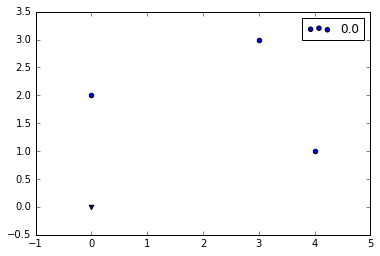

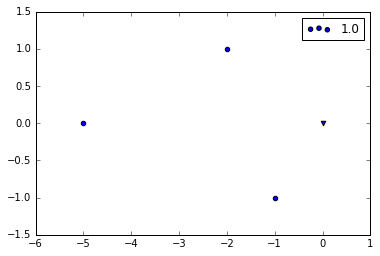

In [41]:
for scanner in data.scanner.unique():
    beacons = data[data.scanner==scanner]
    plt.scatter(beacons.x, beacons.y,label=scanner)
    plt.scatter(0,0, marker='v')
    plt.legend()
    plt.show()

Thoughts:
- compute pairwise distance between all beacons
- look for set of 12 beacons with all pair wise distances the same 
- the 1,000 range on each sensor seems like it should be useful

# Day 20 
The first section is the image enhancement algorithm. The second section is the input image, a two-dimensional grid of light pixels (#) and dark pixels (.). The image enhancement algorithm describes how to enhance an image by simultaneously converting all pixels in the input image into an output image. Each pixel of the output image is determined by looking at a 3x3 square of pixels centered on the corresponding input image pixel. These nine input pixels are combined into a single binary number that is used as an index in the image enhancement algorithm string.

Through advances in imaging technology, the images being operated on here are infinite in size. Every pixel of the infinite output image needs to be calculated exactly based on the relevant pixels of the input image. The small input image you have is only a small region of the actual infinite input image; the rest of the input image consists of dark pixels (.).

**Part 1:** Start with the original input image and apply the image enhancement algorithm twice, being careful to account for the infinite size of the images. How many pixels are lit in the resulting image?

In [287]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\20'
#file = r'test_enhance.txt'
file = r'enhance.txt'

with open(os.path.join(folder,file)) as f:
    enhanceData = f.readlines()

enhanceData = enhanceData[0]
enhanceData = enhanceData.replace('.','0')
enhanceData = enhanceData.replace('#','1')
enhanceData = [int(x) for x in enhanceData]

len(enhanceData)

512

In [288]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\20'
#file = r'test_image.txt'
file = r'image.txt'

image = []

with open(os.path.join(folder,file)) as f:
    for l in f:
        l = l.replace('\n','')
        l = l.replace('.','0')
        l = l.replace('#','1')
        l = l.strip()
        l = [int(x) for x in l]
        
        image.append(l)
        
image = np.array(image)

image = np.pad(image, (3,), mode='constant', constant_values=0)

image.shape

(106, 106)

In [289]:
def enhance(image,enhanceData):
    # enhance the image 
    
    # initialize new blank image
    enhancedImage = np.zeros(image.shape,dtype=int)

    # loop over all pixles except the buffer/boarder
    for r in range(1,image.shape[0]-1):
        for c in range(1,image.shape[1]-1):
            # build a 9 bit binary from the pixels surrounding this pixel
            binary = np.array2string(image[r-1,c-1:c+2],separator='').replace('[','').replace(']','')
            binary += np.array2string(image[r,c-1:c+2],separator='').replace('[','').replace(']','')
            binary += np.array2string(image[r+1,c-1:c+2],separator='').replace('[','').replace(']','')

            # set the pixel value in the enhanced image based on the enhacement algorithm
            idx = int(binary,2)
            enhancedImage[r,c] = enhanceData[idx]

    # remove boarder and pad with 2 more rows/columns that match the current edge values
    enhancedImage = np.pad(enhancedImage[1:-1,1:-1], (2,), mode='edge')

    return enhancedImage

In [290]:
def repeatEnhance(image,enhanceData,numEnhance):
    
    # repeatedly enhance an image some number of times
    for i in range(numEnhance):
        image = enhance(image,enhanceData)
        print('Finished enhancement ',i+1)
        
    # return the number of pixels with value 1
    return image.sum().sum()

In [291]:
repeatEnhance(image,enhanceData,50)

Finished enhancement  1
Finished enhancement  2
Finished enhancement  3
Finished enhancement  4
Finished enhancement  5
Finished enhancement  6
Finished enhancement  7
Finished enhancement  8
Finished enhancement  9
Finished enhancement  10
Finished enhancement  11
Finished enhancement  12
Finished enhancement  13
Finished enhancement  14
Finished enhancement  15
Finished enhancement  16
Finished enhancement  17
Finished enhancement  18
Finished enhancement  19
Finished enhancement  20
Finished enhancement  21
Finished enhancement  22
Finished enhancement  23
Finished enhancement  24
Finished enhancement  25
Finished enhancement  26
Finished enhancement  27
Finished enhancement  28
Finished enhancement  29
Finished enhancement  30
Finished enhancement  31
Finished enhancement  32
Finished enhancement  33
Finished enhancement  34
Finished enhancement  35
Finished enhancement  36
Finished enhancement  37
Finished enhancement  38
Finished enhancement  39
Finished enhancement  40
Finished 

18502

# Day 21
This game consists of a single die, two pawns, and a game board with a circular track containing ten spaces marked 1 through 10 clockwise. Each player's starting space is chosen randomly (your puzzle input). Player 1 goes first. Players take turns moving. On each player's turn, the player rolls the die three times and adds up the results. Then, the player moves their pawn that many times forward around the track (that is, moving clockwise on spaces in order of increasing value, wrapping back around to 1 after 10). After each player moves, they increase their score by the value of the space their pawn stopped on. Players' scores start at 0. The game immediately ends as a win for any player whose score reaches at least 1000.

Since the first game is a practice game, the submarine opens a compartment labeled deterministic dice and a 100-sided die falls out. This die always rolls 1 first, then 2, then 3, and so on up to 100, after which it starts over at 1 again. Play using this die.

**Part 1:** The moment either player wins, what do you get if you multiply the score of the losing player by the number of times the die was rolled during the game?

A second compartment opens, this time labeled Dirac dice. Out of it falls a single three-sided die.

As you experiment with the die, you feel a little strange. An informational brochure in the compartment explains that this is a quantum die: when you roll it, the universe splits into multiple copies, one copy for each possible outcome of the die. In this case, rolling the die always splits the universe into three copies: one where the outcome of the roll was 1, one where it was 2, and one where it was 3.

The game is played the same as before, although to prevent things from getting too far out of hand, the game now ends when either player's score reaches at least 21. 

**Part 2:** Using your given starting positions, determine every possible outcome. Find the player that wins in more universes; in how many universes does that player win?

In [4]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\21'
#file = r'test.txt'
file = r'input.txt'

data = pd.DataFrame()

with open(os.path.join(folder,file)) as f:
    for l in f:
        print(l)
        position = int(l.split(':')[1].strip())
        data = data.append({'startPosition':position},ignore_index=True)

data['curPosition'] = data.startPosition
data['score'] = 0
data

Player 1 starting position: 7

Player 2 starting position: 9



,startPosition,curPosition,score
0,7.0,7.0,0
1,9.0,9.0,0


In [5]:
def playTo1000(data):
    # part 1 solution
    
    # initialize
    lastRoll = 0
    numRolls = 0
    player = 0

    # play until a player reaches a score of at least 1000
    while data.score.max() < 1000:
        
        # determine the number of spaces to move
        moves = 0 
        for i in range(3):
            lastRoll = 1 if lastRoll == 100 else lastRoll + 1
            moves += lastRoll
            numRolls += 1

        # determine the new position
        position = data.loc[player,'curPosition'] + moves
        while position > 10:
            position -= 10

        # update player's current position and score
        data.loc[player,'curPosition'] = position
        data.loc[player,'score'] += position

        # switch players
        player = (player + 1) % 2

    # return losers score times number of rolls
    return int(data.score.min()*numRolls)

In [6]:
playTo1000(data.copy())

679329

In [7]:
# key = number of spaces moved, value = number of universes created
moves = {3:1,
        4:3,
        5:6,
        6:7,
        7:6,
        8:3,
        9:1}

In [8]:
def getPosition(position,moves):
    # get the new position after moving some number of spaces
    
    position += moves
    while position > 10:
        position -= 10
        
    return position

In [9]:
def getWinCounts(data,moves):
    # part 2 solution
     
    # initialize
    player1Wins = 0
    player2Wins = 0
    turnData = {}
    numTurns = 1

    # turn 1
    p2 = data.loc[1,'startPosition']
    # for each possible number of spaces to move
    for key in moves.keys():
        # get new position
        p1 = data.loc[0,'startPosition']
        p1 = getPosition(p1,key)

        # update number of universes with player 1 at position p1 with score s1 
        # and player 2 at position p2 with score s2
        turnData[((p1,p1),(p2,0))] = moves[key]
        
    # repeat for subsequent turns until every universe reaches at least 21
    while turnData:
    
        numTurns += 1
        newTurn = {}
        
        # for each possible number of spaces to move
        for m in moves.keys():
            # for each possible state of the universe
            for (((p1,s1),(p2,s2)), count) in turnData.items():
                # update position and score for player 2 if an even turn and player 2 if an odd turn
                if (numTurns % 2) == 0:
                    p2 = getPosition(p2,m)
                    s2 += p2
                else:
                    p1 = getPosition(p1,m)
                    s1 += p1

                # check if someone one
                if s1 >= 21:
                    player1Wins += count*moves[m]
                elif s2 >= 21:
                    player2Wins += count*moves[m]
                else:
                    # update count for the new state of the universe
                    if ((p1,s1),(p2,s2)) in newTurn:
                        newTurn[(p1,s1),(p2,s2)] += count*moves[m]
                    else:
                        newTurn[(p1,s1),(p2,s2)] = count*moves[m]

        turnData = newTurn
        
    # return the number of universes won by the player who wins the most
    return max(player1Wins, player2Wins)

In [10]:
getWinCounts(data,moves)

433315766324816

# Day 22
The reactor core is made up of a large 3-dimensional grid made up entirely of cubes, one cube per integer 3-dimensional coordinate (x,y,z). Each cube can be either on or off; at the start of the reboot process, they are all off. To reboot the reactor, you just need to set all of the cubes to either on or off by following a list of reboot steps (your puzzle input). Each step specifies a cuboid (the set of all cubes that have coordinates which fall within ranges for x, y, and z) and whether to turn all of the cubes in that cuboid on or off.

**Part 1:** The initialization procedure only uses cubes that have x, y, and z positions of at least -50 and at most 50. For now, ignore cubes outside this region. Execute the reboot steps. Afterward, considering only cubes in the region x=-50..50,y=-50..50,z=-50..50, how many cubes are on?

**Part 2:** Now that the initialization procedure is complete, you can reboot the reactor. Starting with all cubes off, run all of the reboot steps for all cubes in the reactor. Starting again with all cubes off, execute all reboot steps. Afterward, considering all cubes, how many cubes are on?

In [224]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\22'
file = r'test1.txt'
#file = r'input.txt'

data = pd.DataFrame()

with open(os.path.join(folder,file)) as f:
    for l in f:
        l = l.replace('\n','').replace(',y','').replace(',z','')
        l = l.split('=')
        instruction = l[0].replace(' x','')
        instruction = 1 if instruction == 'on' else 0
        x = l[1].split('..')
        y = l[2].split('..')
        z = l[3].split('..')
        data = data.append({'instruction':instruction,'x1':int(x[0]),'x2':int(x[1]),'y1':int(y[0]),'y2':int(y[1]),'z1':int(z[0]),'z2':int(z[1])},ignore_index=True)
        
data = data.astype(int)    
data.head()

,instruction,x1,x2,y1,y2,z1,z2
0,1,10,12,10,12,10,12
1,1,11,13,11,13,11,13
2,0,9,11,9,11,9,11
3,1,10,10,10,10,10,10


In [211]:
def initializationProcess(data):
    # all cubes start off
    # initialization process consideres cubes with dimensions between -50 to 50

    # initialize all cubes in the initialization area to be off
    cubes = np.zeros((101,101,101))
    
    # execute all instructions
    for row in data.itertuples():
        # only instructions in the initialization region
        if (abs(row.x1) <= 50) and (abs(row.x2) <= 50) and (abs(row.y1) <= 50) and (abs(row.y2) <= 50) and (abs(row.z1) <= 50) and (abs(row.z2) <= 50):
            # shift indices because all dimensions start at -50
            xmin = row.x1 + 50
            xmax = row.x2 + 51
            ymin = row.y1 + 50
            ymax = row.y2 + 51
            zmin = row.z1 + 50
            zmax = row.z2 + 51
            # turn cubes on/off
            cubes[xmin:xmax,ymin:ymax,zmin:zmax] = row.instruction
    
    # return the number of cubes that are on
    return int(cubes.sum().sum())

In [217]:
initializationProcess(data)

590784

In [221]:
import pymesh.

In [222]:
x = np.arange(10,13)
y = np.arange(10,13)
z = np.arange(10,13)

vertices = np.array([(10,10,10),(10,12,10),(10,12,12),(10,10,12),(12,10,10),(12,12,10),(12,10,12),(12,12,12)])
pymesh.form_mesh(vertices)

AttributeError: module 'pymesh' has no attribute 'form_mesh'

In [223]:
pymesh

<module 'pymesh' from 'C:\\Users\\sdb97\\Anaconda3\\lib\\site-packages\\pymesh\\__init__.py'>

In [179]:
i = 0
row = data.loc[i]
x1 = np.arange(row.x1,row.x2+1)
y1 = np.arange(row.y1,row.y2+1)
z1 = np.arange(row.z1,row.z2+1)

x1_, y1_, z1_ = np.meshgrid(x1,y1,z1)

x1_.size

139590

In [132]:
i = 1
row = data.loc[i]
x2 = np.arange(row.x1,row.x2+1)
y2 = np.arange(row.y1,row.y2+1)
z2 = np.arange(row.z1,row.z2+1)

x2_,y2_,z2_ = np.meshgrid(x2,y2,z2)
x2_.size

27

In [133]:
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
z = np.concatenate((z1,z2))

x_, y_, z_ = np.meshgrid(x,y,z)
x_.size

216

In [139]:
x = np.union1d(x1_,x2_)
y = np.union1d(y1_,y2_)
z = np.union1d(z1_,z2_)

x_,y_,z_ = np.meshgrid(x,y,z)
x_.size

64

In [153]:
cubes = set()
for point in zip(x1_.ravel(),y1_.ravel(),z1_.ravel()):
    cubes.add(point)

In [156]:
len(cubes)

27

In [152]:
x1_.ravel()

array([10, 10, 10, 11, 11, 11, 12, 12, 12, 10, 10, 10, 11, 11, 11, 12, 12,
       12, 10, 10, 10, 11, 11, 11, 12, 12, 12])

# Day 23

In [678]:
# real input
board = '           ADDBDCBCABADBACC'
# test input 
#board = '           BDDACCBDBBACDACA'

In [679]:
def checkForGoal(board):
    # check if at goal
    correctAmphids = (board[11:15] == 'AAAA') and (board[15:19] == 'BBBB') and (board[19:23] == 'CCCC') and (board[23:] == 'DDDD')
    
    return correctAmphids

In [680]:
def hallway2room(room,letter):
    
    if room.count(' ') + room.count(letter) == 4:
        y = room.count(' ')
        return y
    else:
        return None

In [681]:
def pathClear(board,i,j):
    start = min(i,j)
    stop = max(i,j)
    return board[start:stop+1].count(' ') == len(board[start:stop+1])

In [682]:
def getValidMoves(board):
    # get all valid moves
    moves = []
    
    roomA = board[11:15]
    roomB = board[15:19]
    roomC = board[19:23]
    roomD = board[23:]
    rooms = [roomA,roomB,roomC,roomD]
    openings = [2,4,6,8]
    roomStarts = [11,15,19,23]
    letters = ['A','B','C','D']
    
    # try to move from hallway into a room
    for x in range(11):
        for (room,letter,o,s) in zip(rooms,letters,openings,roomStarts):
            if board[x] == letter: 
                tempBoard = board
                tempBoard = board[:x] + ' ' + board[x+1:]
                if pathClear(tempBoard,x,o):
                    # check if room is empty or only contains the appropriate letters
                    steps = hallway2room(room,letter) 
                    
                    if steps:
                        y = steps + s - 1
                        steps += abs(x-o) 
                        m = {'start':x,'stop':y,'letter':letter,'steps':steps}
                        moves.append(m)
                
    # try to move from each room into the hallway
    for (room,letter,o,s) in zip(rooms,letters,openings,roomStarts):
        if room.count(' ') + room.count(letter) != len(room):
            x = room.count(' ') + s
            for y in [0,1,3,5,7,9,10]:
                steps = x - s
                # is the path clear?
                if pathClear(board,y,o):
                    steps += abs(y-o) + 1
                    m = {'start':x,'stop':y,'letter':board[x],'steps':steps}
                    moves.append(m)
    
    # return a list of dictionarys for each possible move with the start space, end space, letter, and number of moves
    return moves

In [683]:
### NOT USED
def step(board,energyUsed,bestEnergy):
    energyCost = {'A':1,'B':10,'C':100,'D':1000}
    #print(board)
    if not checkForGoal(board):
        print('not finished')
        # get all valid moves
        moves = getValidMoves(board)
        # for each valid move
        if moves:
            print(len(moves),' possible moves')
            for m in moves:
                # add energy used to total energy
                newEnergy = energyUsed + m['steps'] * energyCost[m['letter']]
                if newEnergy < bestEnergy:

                    # update the the board
                    newBoard = board.copy()
                    newBoard[m['start']] = ''
                    newBoard[m['stop']] = m['letter']
                    #print(newBoard)

                    # recurse
                    energy = step(newBoard,newEnergy,bestEnergy)
                    if (energy) and (energy < bestEnergy):
                        bestEnergy = energy
                        print('new best energy of ',bestEnergy)
                        
                    return bestEnergy

        # if no valid moves
        else:
            print('no possible moves')
            # stop and return invalid path
            return False
            
    else: 
        print('finished with energy ',energyUsed)
        # return final energy total
        return  energyUsed

In [684]:
def dijkstras2(initialBoard):
    # dijkstra's algorithm 
    # node = game board
    # edge = valid move
    # edge weight = energy used on move
    
    
    energyCost = {'A':1,'B':10,'C':100,'D':1000}
    
    prev = {} # previous node in the path to a given node
    nodes = [] # nodes for consideration
    visited = set() # nodes that have been visited
        
    # dictionary of distances
    dist = defaultdict(lambda: float('inf'))
    dist[initialBoard] = 0
    # first node to consider is the source
    heapq.heappush(nodes, (0, initialBoard))

    # while there are still nodes to consider
    while nodes:
        # get node with minimum distance from the source
        _, board = heapq.heappop(nodes)
        visited.add(board)
 
        # stop if the target has been reached 
        if checkForGoal(board):
            break

        # get all possible moves
        neighbors = getValidMoves(board)
            
        for m in neighbors:
            # update the the board
            newBoard = board[:m['start']] + ' ' + board[m['start']+1:]
            newBoard = newBoard[:m['stop']] + m['letter'] + newBoard[m['stop']+1:]

            if (newBoard in visited):
                # skip this neighbor if it has already been visited
                continue
            
            # distance from source if neighbor added to current path
            
            newDist = dist[board] + m['steps'] * energyCost[m['letter']]
            if dist[newBoard] > newDist:
                # set previous node for this neighbor
                prev[newBoard] = board
                # update distance from source
                dist[newBoard] = newDist
                # add  neighbor to nodes for consideration
                heapq.heappush(nodes, (newDist, newBoard))
        
    return dist, prev

In [685]:
dist, prev = dijkstras2(board)
len(dist)

95288

In [686]:
finalBoard = '           AAAABBBBCCCCDDDD'
dist[finalBoard]

43567

# Day 24

In [93]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\24'
#file = r'test3.txt'
file = r'input.txt'

instructions = []

with open(os.path.join(folder,file)) as f:
    for l in f:
        l = l.replace('\n','')
        l = l.split(' ')
        d = {}
        d['operator'] = l[0]
        d['a'] = l[1]
        if len(l)==3:
            d['b'] = l[2]
        instructions.append(d)
        
instructions

[{'a': 'w', 'operator': 'inp'},
 {'a': 'x', 'b': '0', 'operator': 'mul'},
 {'a': 'x', 'b': 'z', 'operator': 'add'},
 {'a': 'x', 'b': '26', 'operator': 'mod'},
 {'a': 'z', 'b': '1', 'operator': 'div'},
 {'a': 'x', 'b': '12', 'operator': 'add'},
 {'a': 'x', 'b': 'w', 'operator': 'eql'},
 {'a': 'x', 'b': '0', 'operator': 'eql'},
 {'a': 'y', 'b': '0', 'operator': 'mul'},
 {'a': 'y', 'b': '25', 'operator': 'add'},
 {'a': 'y', 'b': 'x', 'operator': 'mul'},
 {'a': 'y', 'b': '1', 'operator': 'add'},
 {'a': 'z', 'b': 'y', 'operator': 'mul'},
 {'a': 'y', 'b': '0', 'operator': 'mul'},
 {'a': 'y', 'b': 'w', 'operator': 'add'},
 {'a': 'y', 'b': '9', 'operator': 'add'},
 {'a': 'y', 'b': 'x', 'operator': 'mul'},
 {'a': 'z', 'b': 'y', 'operator': 'add'},
 {'a': 'w', 'operator': 'inp'},
 {'a': 'x', 'b': '0', 'operator': 'mul'},
 {'a': 'x', 'b': 'z', 'operator': 'add'},
 {'a': 'x', 'b': '26', 'operator': 'mod'},
 {'a': 'z', 'b': '1', 'operator': 'div'},
 {'a': 'x', 'b': '12', 'operator': 'add'},
 {'a': 

In [94]:
def ALU(inputs,instructions):
    variables = {'w':0,'x':0,'y':0,'z':0}

    for i in instructions:
        if i['operator'] == 'inp':
            val = inputs.pop(0)
            string = i['a'] + ' = ' + str(val)
            #print(string)
            exec(string,variables)

        elif i['operator'] == 'add':
            string = i['a'] + ' = ' + i['a'] + ' + ' + i['b']
            #print(string)
            exec(string,variables)

        elif i['operator'] == 'mul':
            string = i['a'] + ' = ' + i['a'] + ' * ' + i['b']
            #print(string)
            exec(string,variables)

        elif i['operator'] == 'div':
            string = i['a'] + ' = ' + i['a'] + ' // ' + i['b']
            #print(string)
            exec(string,variables)

        elif i['operator'] == 'mod':
            string = i['a'] + ' = ' + i['a'] + ' % ' + i['b']
            #print(string)
            exec(string,variables)

        elif i['operator'] == 'eql':
            string = i['a'] + ' = int(' + i['a'] + ' == ' + i['b'] + ')'
            #print(string)
            exec(string,variables)

    return variables['w'],variables['x'],variables['y'],variables['z']

In [95]:
inputs = [9,9,9,9,9,9,9,9,9,9,9,9,9,9]
ALU(inputs,instructions)

(9, 1, 21, 219992001)

In [99]:
from itertools import permutations, product

In [122]:
biggestNumber = 0
counter = 1
for digits in product([1,2,3,4,5,6,7,8,9],repeat=14):
    _,_,_,z = ALU(list(digits),instructions)
    number = [str(i) for i in digits]
    number = int("".join(number))
    if (z == 0) and (number > biggestNumber):
        biggestNumber = number
        
    if (counter % 1000) == 0:
        print('{c} of 100,000,000,000,000 checked'.format(c=counter))
        
    counter += 1

1000 of 100,000,000,000,000 checked
2000 of 100,000,000,000,000 checked
3000 of 100,000,000,000,000 checked
4000 of 100,000,000,000,000 checked
5000 of 100,000,000,000,000 checked
6000 of 100,000,000,000,000 checked
7000 of 100,000,000,000,000 checked
8000 of 100,000,000,000,000 checked
9000 of 100,000,000,000,000 checked
10000 of 100,000,000,000,000 checked
11000 of 100,000,000,000,000 checked
12000 of 100,000,000,000,000 checked
13000 of 100,000,000,000,000 checked
14000 of 100,000,000,000,000 checked
15000 of 100,000,000,000,000 checked
16000 of 100,000,000,000,000 checked
17000 of 100,000,000,000,000 checked
18000 of 100,000,000,000,000 checked
19000 of 100,000,000,000,000 checked
20000 of 100,000,000,000,000 checked
21000 of 100,000,000,000,000 checked
22000 of 100,000,000,000,000 checked
23000 of 100,000,000,000,000 checked
24000 of 100,000,000,000,000 checked
25000 of 100,000,000,000,000 checked
26000 of 100,000,000,000,000 checked
27000 of 100,000,000,000,000 checked
28000 of 1

KeyboardInterrupt: 

In [128]:
number = 99999999999999
inputs = [int(x) for x in str(number)]
valid = False

counter = 0

while not valid:
    counter += 1
    _,_,_,z = ALU(inputs,instructions)
    
    valid = z == 0
    if (counter % 1000) == 0:
        print('{c} of 100,000,000,000,000 checked'.format(c=counter))
    number -= 1
    inputs = [int(x) for x in str(number)]
    while 0 in inputs:
        number -= 1
        inputs = [int(x) for x in str(number)]
        

1000 of 100,000,000,000,000 checked
2000 of 100,000,000,000,000 checked
3000 of 100,000,000,000,000 checked
4000 of 100,000,000,000,000 checked
5000 of 100,000,000,000,000 checked
6000 of 100,000,000,000,000 checked
7000 of 100,000,000,000,000 checked
8000 of 100,000,000,000,000 checked
9000 of 100,000,000,000,000 checked
10000 of 100,000,000,000,000 checked
11000 of 100,000,000,000,000 checked
12000 of 100,000,000,000,000 checked
13000 of 100,000,000,000,000 checked
14000 of 100,000,000,000,000 checked
15000 of 100,000,000,000,000 checked
16000 of 100,000,000,000,000 checked
17000 of 100,000,000,000,000 checked
18000 of 100,000,000,000,000 checked
19000 of 100,000,000,000,000 checked
20000 of 100,000,000,000,000 checked
21000 of 100,000,000,000,000 checked
22000 of 100,000,000,000,000 checked
23000 of 100,000,000,000,000 checked
24000 of 100,000,000,000,000 checked
25000 of 100,000,000,000,000 checked
26000 of 100,000,000,000,000 checked
27000 of 100,000,000,000,000 checked
28000 of 1

KeyboardInterrupt: 

In [126]:
0 in inputs

False

In [129]:
number

99999967295146

# Day 25

In [214]:
folder = r'C:\Users\sdb97\Dropbox\AdventOfCode\25'
#file = r'test.txt'
file = r'input.txt'

data = []

with open(os.path.join(folder,file)) as f:
    for l in f:
        l = l.replace('\n','')
        data.append(list(l))
        
data = np.array(data)
data

array([['>', '.', '>', ..., '>', '.', 'v'],
       ['.', '>', '>', ..., 'v', 'v', '.'],
       ['v', 'v', '>', ..., '>', '>', '.'],
       ..., 
       ['>', 'v', '.', ..., '>', '>', '.'],
       ['>', '.', '.', ..., '>', '.', 'v'],
       ['.', '>', '.', ..., '.', 'v', 'v']], 
      dtype='<U1')

In [215]:
def moveEast(state):
    
    moves = 0
    nextState = state.copy()
    # move east
    for i in range(state.shape[0]):
        for j in range(state.shape[1]):
            if state[i,j] == '>':
                if j == state.shape[1] - 1:
                    if state[i,0] == '.':
                        nextState[i,j] = '.'
                        nextState[i,0] = '>'
                        moves += 1
                else:
                    if state[i,j+1] == '.':
                        nextState[i,j] = '.'
                        nextState[i,j+1] = '>'
                        moves += 1

    return nextState, moves

In [216]:
def moveSouth(state):
    
    nextState = state.copy()
    moves = 0
    
    # move east
    for i in range(state.shape[0]):
        for j in range(state.shape[1]):
            if state[i,j] == 'v':
                if i == state.shape[0] - 1:
                    if state[0,j] == '.':
                        nextState[i,j] = '.'
                        nextState[0,j] = 'v'
                        moves += 1
                else:
                    if state[i+1,j] == '.':
                        nextState[i,j] = '.'
                        nextState[i+1,j] = 'v'
                        moves += 1

    return nextState, moves

In [217]:
def step(data):
    numMoves = 0
    data, moves = moveEast(data)
    numMoves += moves
    
    data, moves = moveSouth(data)
    numMoves += moves
    
    return data, numMoves

In [218]:
def stepUntilNoMoves(data):

    numSteps = 1
    data, moves = step(data)

    while moves > 0:
        numSteps += 1
        data, moves = step(data)

    return data, numSteps

In [219]:
data,  numSteps = stepUntilNoMoves(data)
numSteps

380